In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Date': pd.date_range(start='2025-01-01', periods=100, freq='D'),
    'Sales_Amount': np.random.normal(500, 100, 100),
    'Discount_Percent': np.random.uniform(0, 20, 100),
    'Customer_Segment': np.random.choice(['New', 'Returning', 'Loyal'], 100),
    'Store_ID': np.random.choice(['S001', 'S002', 'S003', 'S004'], 100),
    'Promotion_Active': np.random.choice([True, False], 100, p=[0.6, 0.4]),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 100)
}

In [3]:
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df.head()

,Sales_Amount,Discount_Percent,Customer_Segment,Store_ID,Promotion_Active,Region
Date,,,,,,
2025-01-01,551.066025,8.221246,Loyal,S003,True,East
2025-01-02,491.047746,11.872223,New,S003,True,East
2025-01-03,349.874485,19.959165,New,S001,False,West
2025-01-04,633.606024,19.360103,New,S002,True,South
2025-01-05,471.991220,10.594392,New,S002,False,West


Lesson 1: Filtering with Multiple Conditions
Task: Filter the DataFrame to include only rows where Sales_Amount is above 500 and Promotion_Active is True. Add a column Sale_Category that labels Sales_Amount as 'Low' (< 450), 'Medium' (450-550), or 'High' (> 550) using np.select(). Display the first 10 rows.
Hints: Use boolean indexing with & and define three conditions for np.select().

In [4]:
# Should understand .iloc
filtered_df = df[(df['Sales_Amount'] > 500) & (df['Promotion_Active'] == True)].copy()

conditions = [
    filtered_df['Sales_Amount'] < 450,
    (filtered_df['Sales_Amount'] >= 450) & (filtered_df['Sales_Amount'] < 550)
]
choices = ['Low', 'Medium']

filtered_df['Sale_Category'] = np.select(conditions, choices, default='High')
filtered_df.tail(2)

,Sales_Amount,Discount_Percent,Customer_Segment,Store_ID,Promotion_Active,Region,Sale_Category
Date,,,,,,,
2025-04-05,507.542190,16.503763,Returning,S001,True,North,Medium
2025-04-10,510.028836,6.506311,Loyal,S003,True,South,Medium


Lesson 2: Grouping with Custom Aggregation
Task: Group the DataFrame by Customer_Segment and calculate the average Sales_Amount, the sum of Discount_Percent, and a custom aggregation for Sales_Amount (difference between max and min) using a lambda function. Sort by average Sales_Amount.
Hints: Use groupby() and agg() with a dictionary including a lambda function.

In [5]:
# Help us avoid lambda_0 in table head
def calculate_range(x):
    return x.max() - x.min()

df_grouped = df.groupby('Customer_Segment').agg({
    'Sales_Amount': ['mean', calculate_range],
    'Discount_Percent': 'sum',
})

df_grouped.columns = ['_'.join(col).strip() for col in df_grouped.columns]

df_grouped.sort_values('Sales_Amount_mean')

,Sales_Amount_mean,Sales_Amount_calculate_range,Discount_Percent_sum
Customer_Segment,,,
New,485.223687,418.068912,346.958759
Returning,513.929918,349.978879,295.168303
Loyal,521.477489,411.842432,299.496063


Lesson 3: Conditional Column with Binning
Task: Create a column Discount_Level that categorizes Discount_Percent as 'Low' (0-5), 'Moderate' (5-15), or 'High' (15-20) using pd.cut(). Display the value counts.
Hints: Use pd.cut() with bins and labels instead of np.select().

In [6]:
# Create Discount_Level using pd.cut()
df['Discount_Level'] = pd.cut(
    df['Discount_Percent'], 
    bins=[0, 5, 15, 20], 
    labels=['Low', 'Moderate', 'High']
)

df['Discount_Level'].value_counts()

Discount_Level
Moderate    54
Low         26
High        20
Name: count, dtype: int64

In [7]:
df.head()

,Sales_Amount,Discount_Percent,Customer_Segment,Store_ID,Promotion_Active,Region,Discount_Level
Date,,,,,,,
2025-01-01,551.066025,8.221246,Loyal,S003,True,East,Moderate
2025-01-02,491.047746,11.872223,New,S003,True,East,Moderate
2025-01-03,349.874485,19.959165,New,S001,False,West,High
2025-01-04,633.606024,19.360103,New,S002,True,South,High
2025-01-05,471.991220,10.594392,New,S002,False,West,Moderate


Lesson 4: Line Plot with Dual Axes
Task: Create a line plot with two y-axes: one for Sales_Amount (left) and one for Discount_Percent (right) over time. Add a title and labels.
Hints: Use twinx() to create a second y-axis and plot both series.

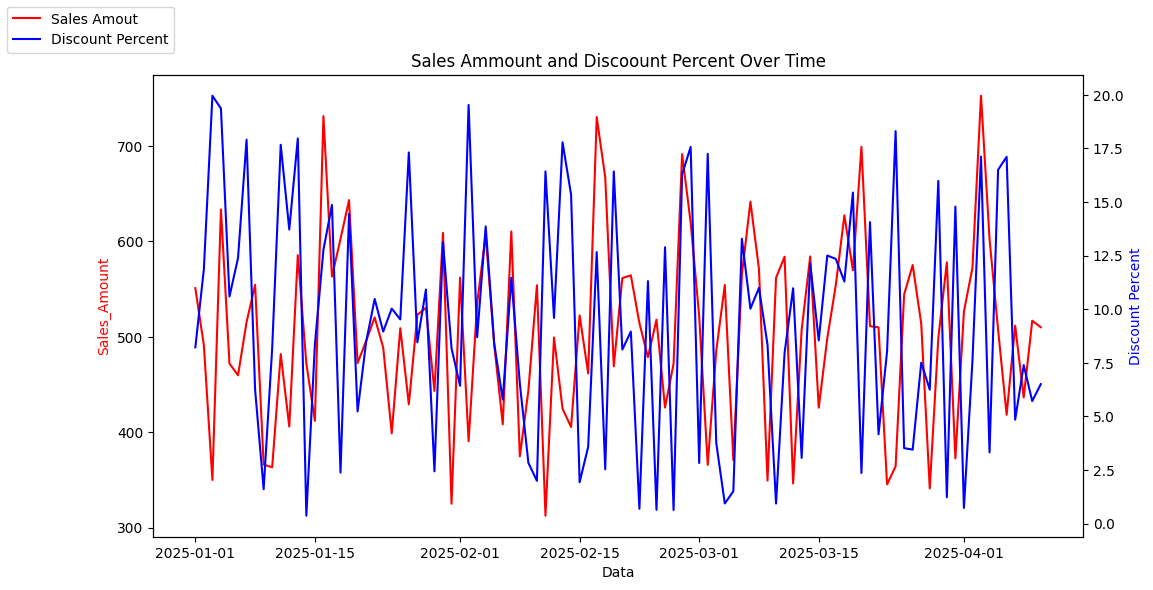

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['Sales_Amount'], color='red', label='Sales Amout')
ax1.set_xlabel('Data')
ax1.set_ylabel('Sales_Amount', color='red')

ax2 = ax1.twinx()
ax2.plot(df.index, df['Discount_Percent'], color='blue', label='Discount Percent')
ax2.set_ylabel('Discount Percent', color='blue')

plt.title('Sales Ammount and Discoount Percent Over Time')
fig.legend(loc='upper left')

plt.show()

Lesson 5: Bar Plot with Error Bars
Task: Create a bar plot showing the average Sales_Amount for each Region, with error bars representing the standard deviation. Add a title.
Hints: Use sns.barplot() with ci='sd' for standard deviation error bars.

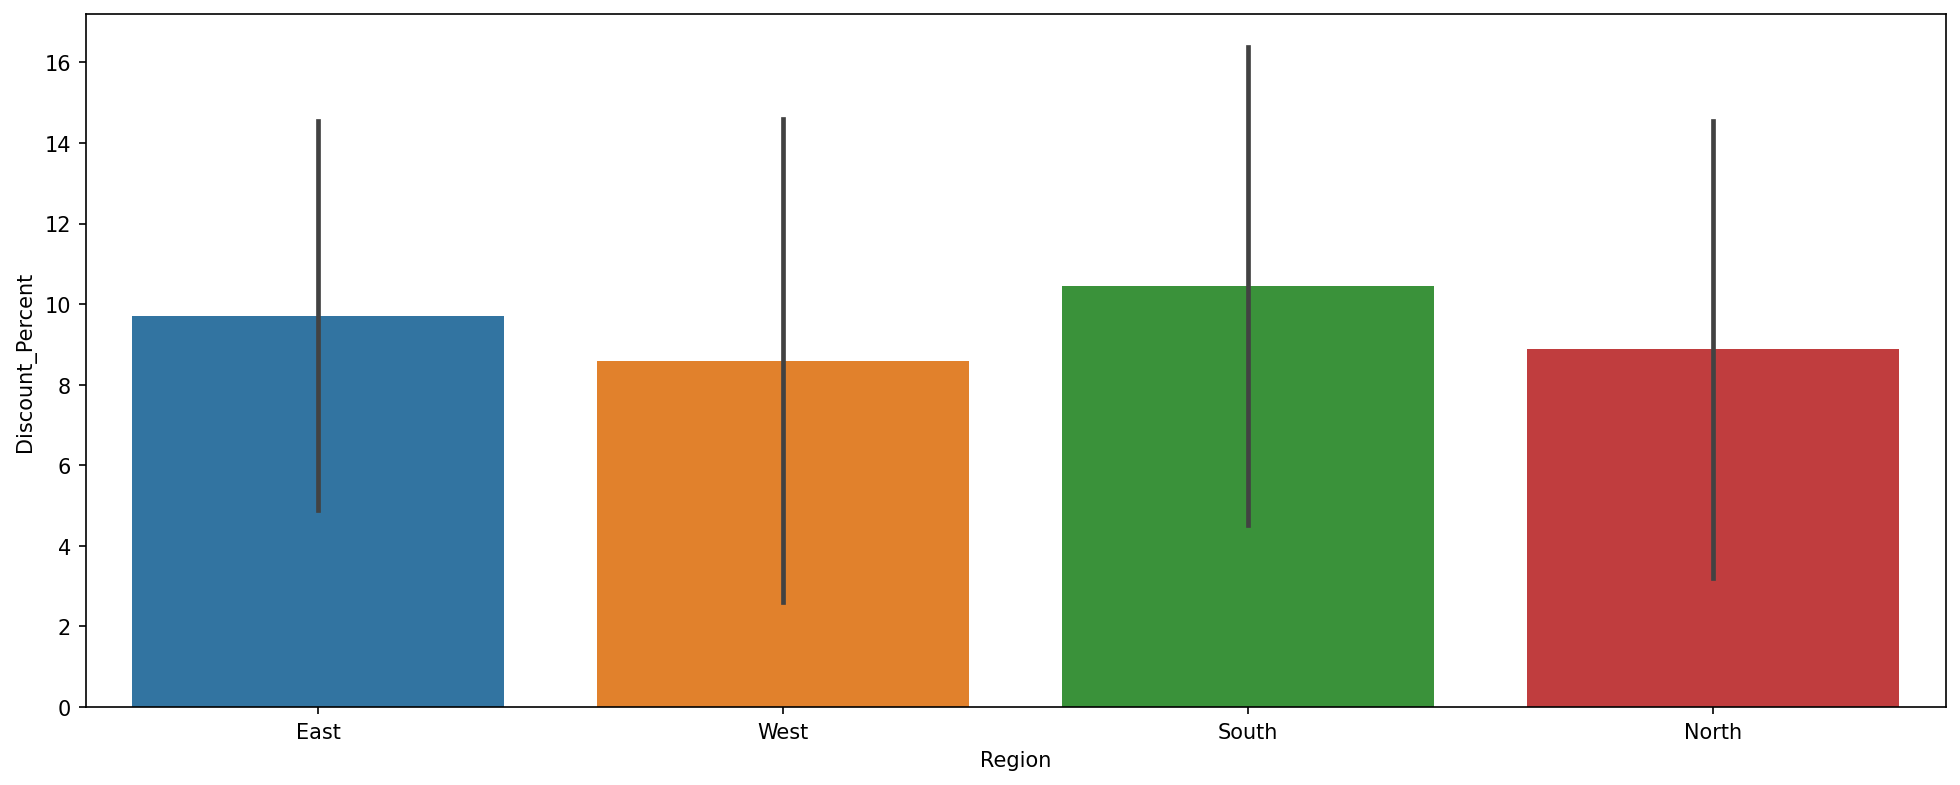

In [9]:
plt.figure(figsize=(16, 6), dpi=150)
sns.barplot(data=df, x='Region', y='Discount_Percent', hue='Region', errorbar='sd')

plt.show()

<Figure size 2400x900 with 0 Axes>

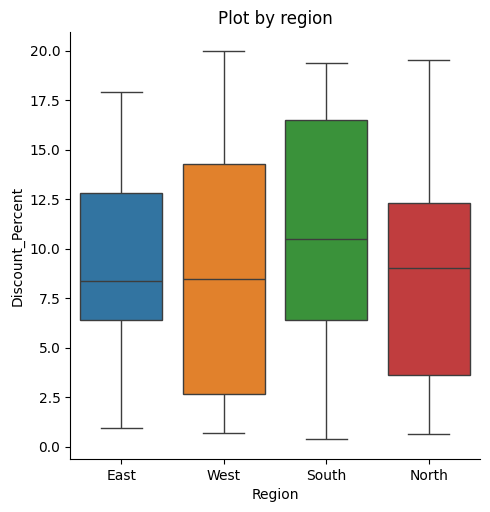

In [10]:
plt.figure(figsize=(16, 6), dpi=150)
sns.catplot(data=df, x='Region', y='Discount_Percent', kind='box', hue='Region', errorbar='sd')
plt.title('Plot by region')
plt.show()

Lesson 6: Scatter Plot with Size and Hue
Task: Create a scatter plot of Sales_Amount vs. Discount_Percent, using Promotion_Active for color (hue) and Customer_Segment for point size. Add a title.
Hints: Use sns.scatterplot() with hue= and size=.

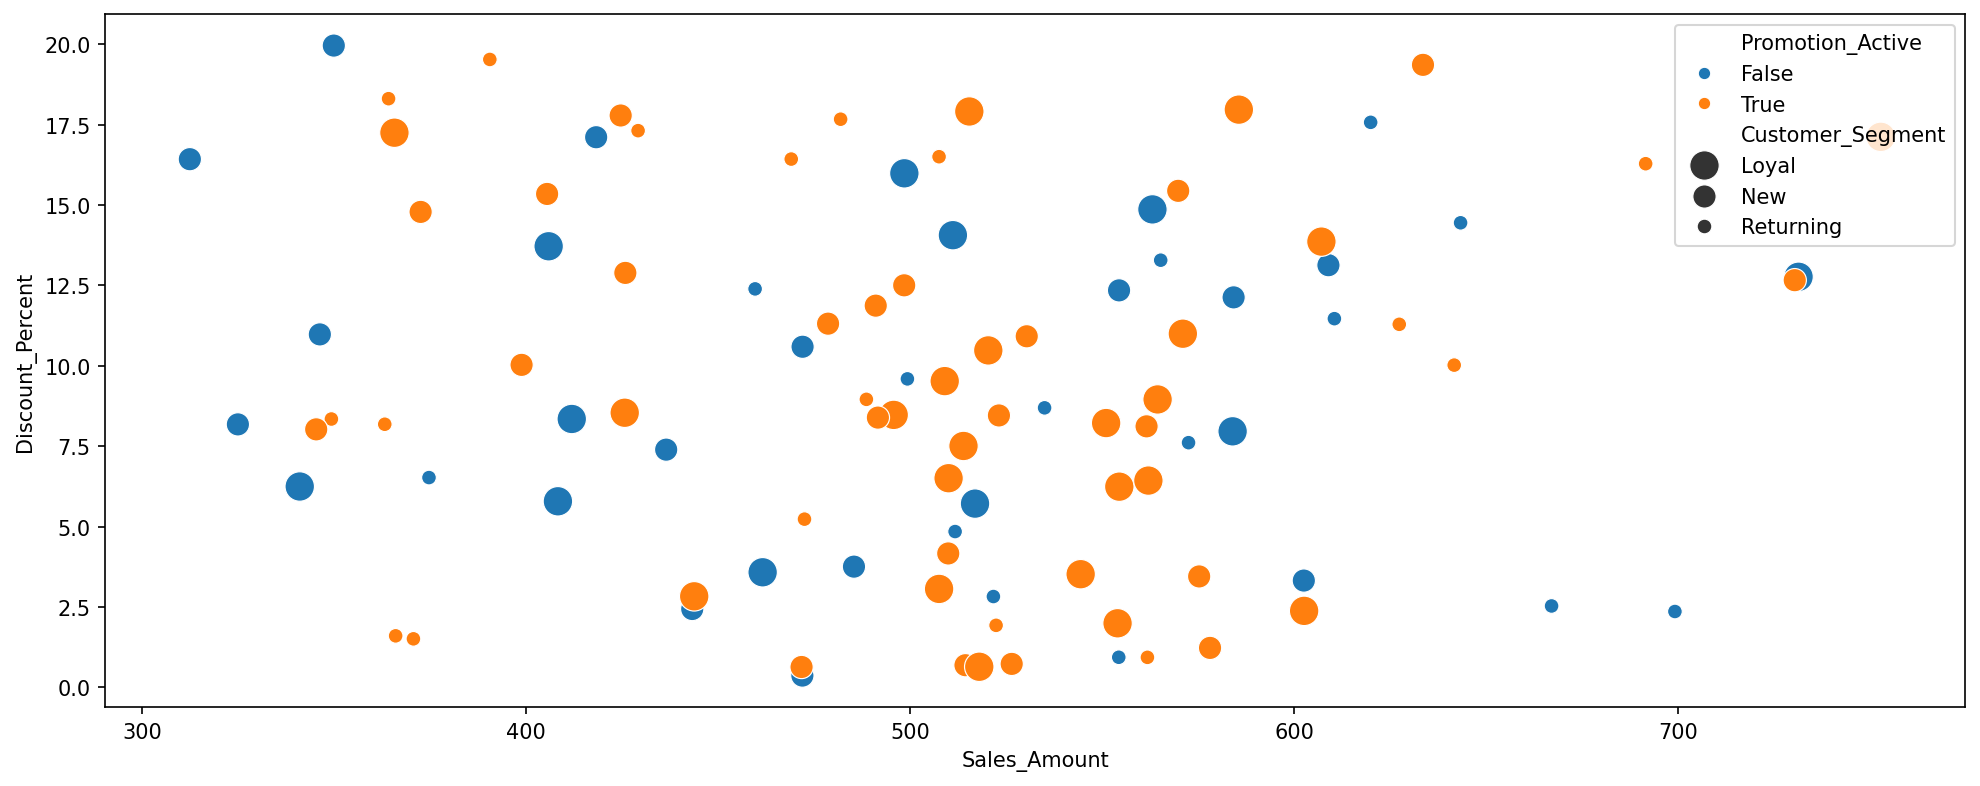

In [11]:
plt.figure(figsize=(16, 6), dpi=150)
sns.scatterplot(
    data=df,
    x=df['Sales_Amount'], 
    y=df['Discount_Percent'], 
    hue='Promotion_Active',
    size='Customer_Segment', 
    sizes=(50, 200)
)

plt.show()

Lesson 7: Violin Plot by Store
Task: Create a violin plot of Sales_Amount for each Store_ID. Add a title.
Hints: Use sns.violinplot() to show the distribution and density.

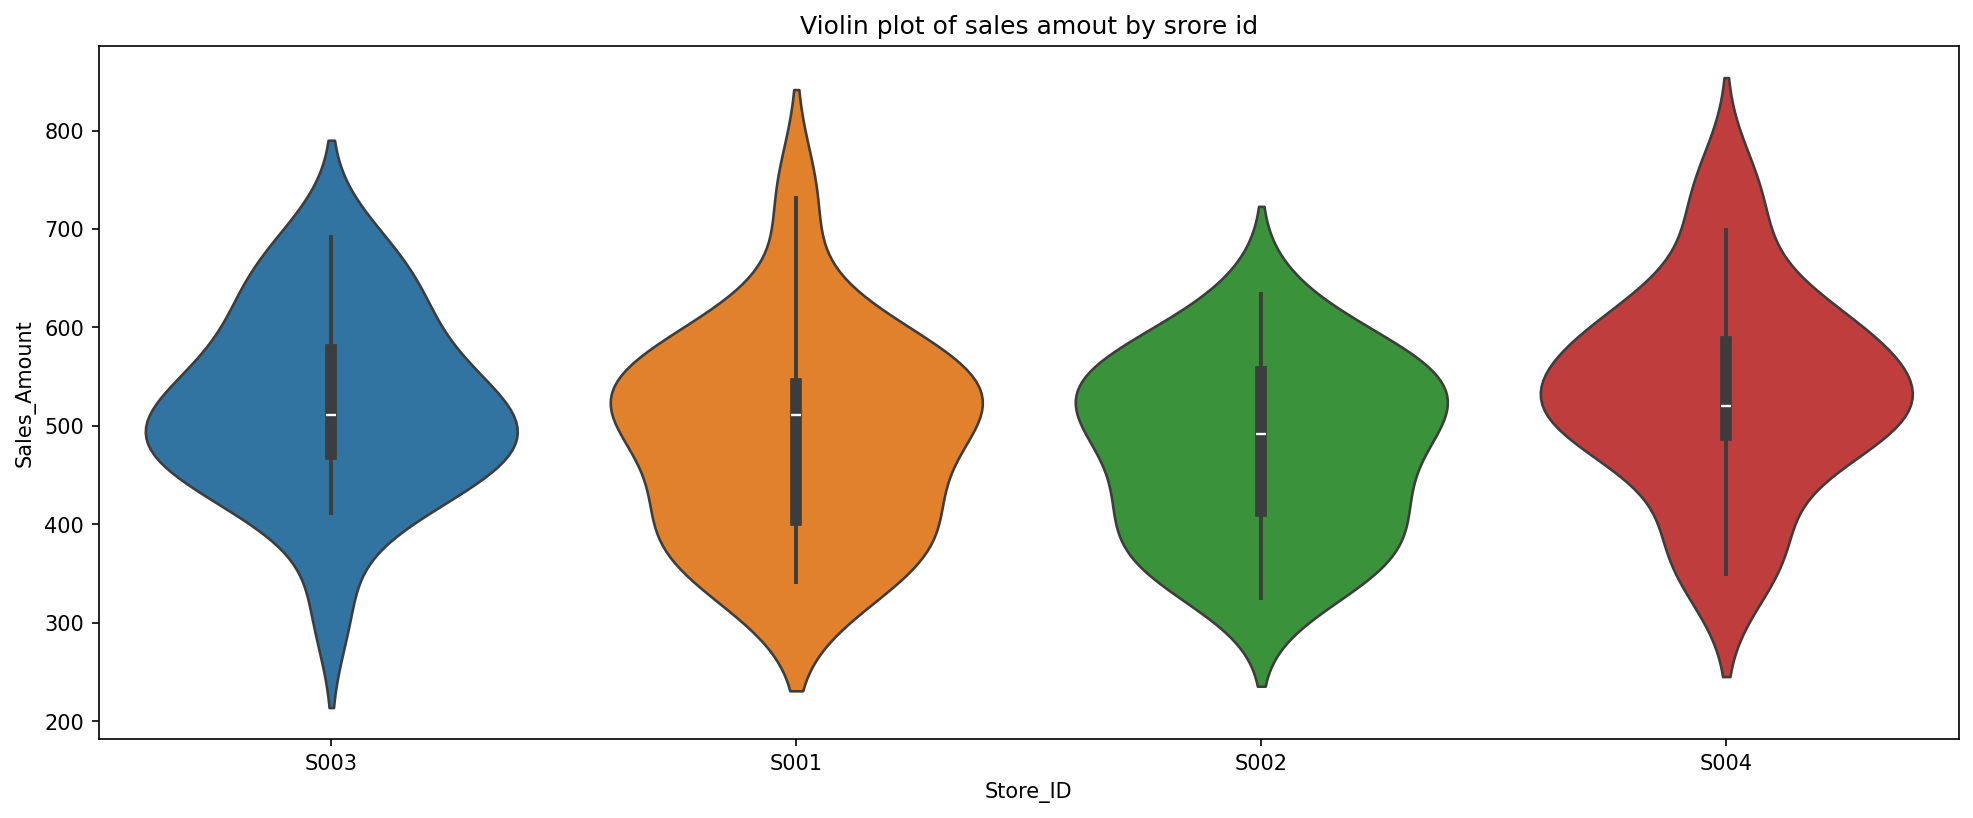

In [12]:
plt.figure(figsize=(16, 6), dpi=150)
sns.violinplot(data=df, x=df['Store_ID'], y=df['Sales_Amount'], hue='Store_ID')
plt.title('Violin plot of sales amout by srore id')

plt.show()

Lesson 8: Pair Plot for Relationships
Task: Create a pair plot for Sales_Amount, Discount_Percent, and Customer_Rating (if added) to explore relationships. Add a hue for Promotion_Active.
Hints: Use sns.pairplot() with hue= and select relevant columns.

<Figure size 2400x900 with 0 Axes>

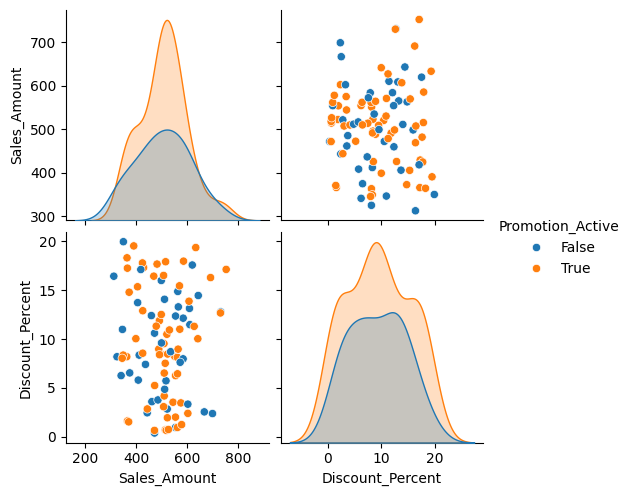

In [13]:
plt.figure(figsize=(16, 6), dpi=150)
sns.pairplot(data=df[['Sales_Amount', 'Discount_Percent', 'Promotion_Active']], hue='Promotion_Active')

plt.show()

Lesson 9: Stacked Area Plot
Task: Create a stacked area plot showing the total Sales_Amount for each Region over time (monthly sums). Add a legend.
Hints: Use resample('M').sum() to aggregate monthly and plt.stackplot().

C:\Users\eto\AppData\Local\Temp\ipykernel_1260\1655073161.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_sales = df.groupby('Region', group_keys=True).apply(resample_group)


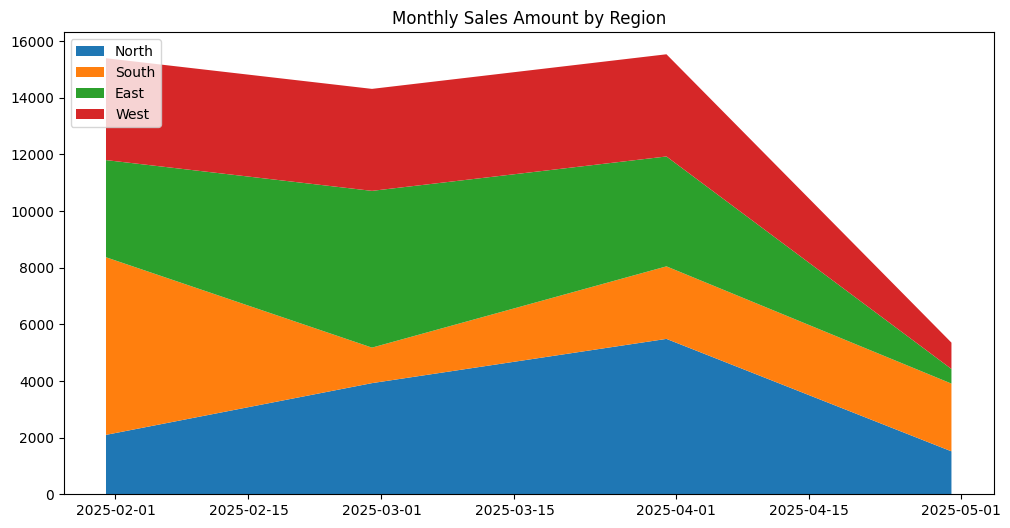

In [14]:
# Define a function to resample within each group
def resample_group(group):
    return group.resample('ME').sum(numeric_only=True)

# Group by Region and apply resample, preserving the multi-index
monthly_sales = df.groupby('Region', group_keys=True).apply(resample_group)

# Pivot the data to have Region as columns
monthly_sales_by_region = monthly_sales['Sales_Amount'].unstack(level=0)  # Unstack level 0 (Region)

# Set up the figure
plt.figure(figsize=(12, 6))

# Create stacked area plot
plt.stackplot(monthly_sales_by_region.index,
              monthly_sales_by_region['North'],
              monthly_sales_by_region['South'],
              monthly_sales_by_region['East'],
              monthly_sales_by_region['West'],
              labels=['North', 'South', 'East', 'West'])

# Add title and legend
plt.title('Monthly Sales Amount by Region')
plt.legend(loc='upper left')

# Show the plot
plt.show()

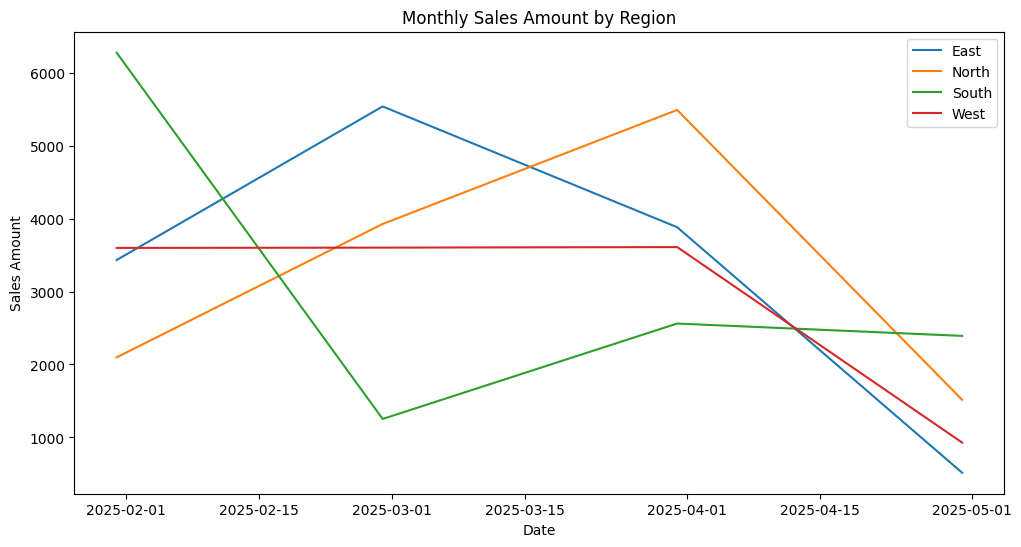

In [15]:
# Resample and unstack
monthly_sales = df.groupby('Region').resample('ME')['Sales_Amount'].sum().unstack(level=0)

# Plot
plt.figure(figsize=(12, 6))
for region in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[region], label=region)
plt.title('Monthly Sales Amount by Region')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

Lesson 10: Heatmap of Sales by Region and Segment
Task
Create a heatmap showing the average Sales_Amount for each combination of Region and Customer_Segment. Add a title.

Hints
Use pivot_table() to reshape the data into a grid of average Sales_Amount with Region as rows and Customer_Segment as columns.
Use sns.heatmap() to visualize the grid with colors and annotations.
The annot=True parameter will display the average values in each cell.
Use a color map (e.g., 'YlOrRd') for better contrast.

In [16]:
df.head()

,Sales_Amount,Discount_Percent,Customer_Segment,Store_ID,Promotion_Active,Region,Discount_Level
Date,,,,,,,
2025-01-01,551.066025,8.221246,Loyal,S003,True,East,Moderate
2025-01-02,491.047746,11.872223,New,S003,True,East,Moderate
2025-01-03,349.874485,19.959165,New,S001,False,West,High
2025-01-04,633.606024,19.360103,New,S002,True,South,High
2025-01-05,471.991220,10.594392,New,S002,False,West,Moderate


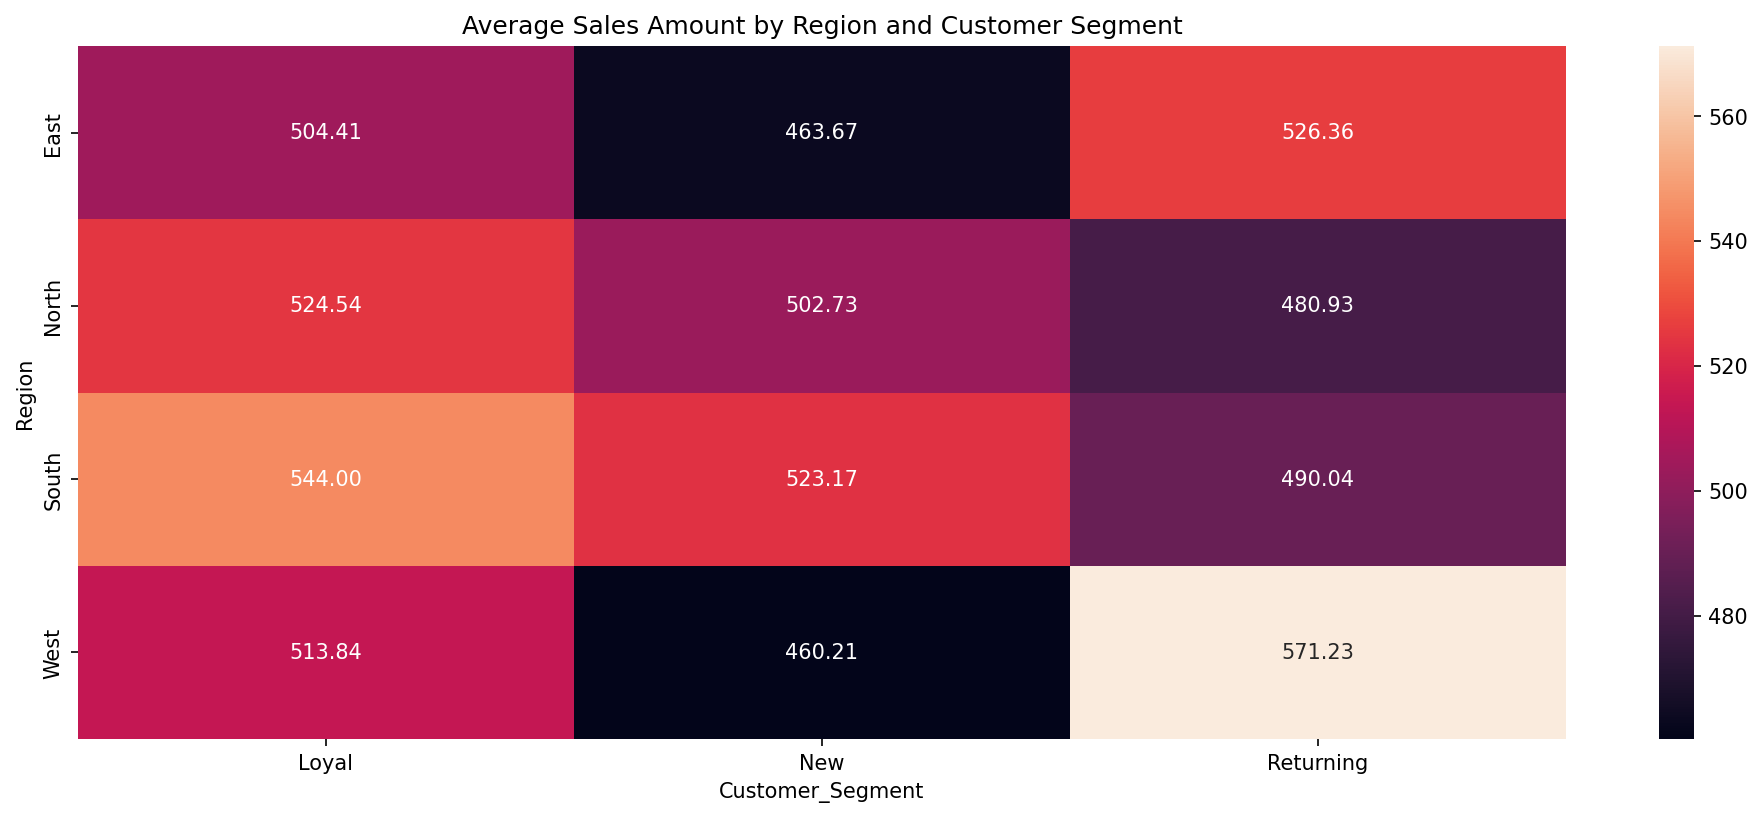

In [17]:
# Create pivot table
pivot_df = df.pivot_table(
    values='Sales_Amount', 
    index='Region', 
    columns='Customer_Segment', 
    aggfunc='mean'
)

plt.figure(figsize=(16, 6), dpi=150)
sns.heatmap(data=pivot_df, annot=True, fmt='.2f')
plt.title('Average Sales Amount by Region and Customer Segment')

plt.show()